In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings('ignore')

In [2]:
path = r"C:\Users\Abhilash\Desktop\Data Trained\Projects\Dataset\Automobile_insurance_fraud.csv"
import chardet
with open (path,'rb') as rawdata:
    result = chardet.detect(rawdata.read(10000))
result    

{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}

In [3]:
data = pd.read_csv(path,encoding = 'ascii')

data.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [4]:
data.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [5]:
data.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [6]:
data.shape

(1000, 40)

In [7]:
data.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    4
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

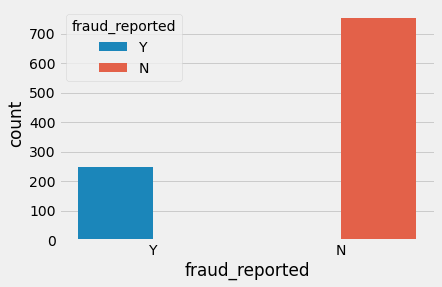

In [9]:
plt.style.use('fivethirtyeight')
ax = sns.countplot(x='fraud_reported', data=data, hue='fraud_reported')

In [10]:
#The data looks a bit imbalanced however this is the reprort

In [11]:

data['fraud_reported'].value_counts() 
# Counting the number of frauds vs non-frauds

N    753
Y    247
Name: fraud_reported, dtype: int64

In [12]:
data['incident_state'].value_counts()

NY    262
SC    248
WV    217
VA    110
NC    110
PA     30
OH     23
Name: incident_state, dtype: int64

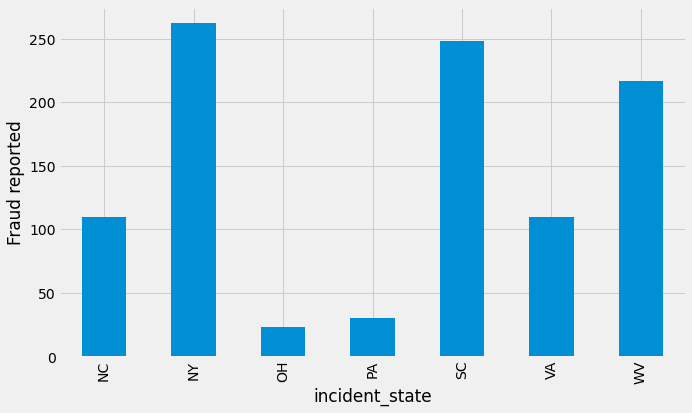

In [13]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(10,6))
ax = data.groupby('incident_state').fraud_reported.count().plot.bar(ylim=0)
ax.set_ylabel('Fraud reported')
plt.show()

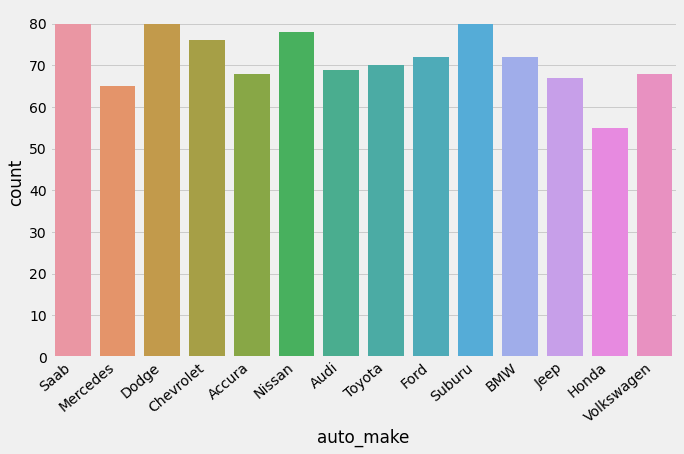

In [14]:
#Checking for the individual vehicle
fig = plt.figure(figsize=(10,6))
ax = sns.countplot(x='auto_make', data=data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

In [15]:
data["insured_occupation"].value_counts()

machine-op-inspct    93
prof-specialty       85
tech-support         78
sales                76
exec-managerial      76
craft-repair         74
transport-moving     72
priv-house-serv      71
other-service        71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64

In [16]:
#First let me convert allt he yes as 1 and no as 0

In [17]:
data['fraud_reported'].replace(to_replace='Y', value=1, inplace=True)
data['fraud_reported'].replace(to_replace='N',  value=0, inplace=True)

data.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,1,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,1,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,0,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,1,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,0,NaN


In [19]:
data[['insured_zip']] = data[['insured_zip']].astype(object)

In [21]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
months_as_customer,1000.0,2.039540e+02,1.151132e+02,0.00,115.7500,199.5,276.250,479.00
age,1000.0,3.894800e+01,9.140287e+00,19.00,32.0000,38.0,44.000,64.00
policy_number,1000.0,5.462386e+05,2.570630e+05,100804.00,335980.2500,533135.0,759099.750,999435.00
policy_deductable,1000.0,1.136000e+03,6.118647e+02,500.00,500.0000,1000.0,2000.000,2000.00
policy_annual_premium,1000.0,1.256406e+03,2.441674e+02,433.33,1089.6075,1257.2,1415.695,2047.59
umbrella_limit,1000.0,1.101000e+06,2.297407e+06,-1000000.00,0.0000,0.0,0.000,10000000.00
capital-gains,1000.0,2.512610e+04,2.787219e+04,0.00,0.0000,0.0,51025.000,100500.00
capital-loss,1000.0,-2.679370e+04,2.810410e+04,-111100.00,-51500.0000,-23250.0,0.000,0.00
incident_hour_of_the_day,1000.0,1.164400e+01,6.951373e+00,0.00,6.0000,12.0,17.000,23.00
number_of_vehicles_involved,1000.0,1.839000e+00,1.018880e+00,1.00,1.0000,1.0,3.000,4.00


In [22]:
data.auto_year.value_counts()

1995    56
1999    55
2005    54
2011    53
2006    53
2007    52
2003    51
2010    50
2009    50
2013    49
2002    49
2015    47
1997    46
2012    46
2008    45
2014    44
2001    42
2000    42
1998    40
2004    39
1996    37
Name: auto_year, dtype: int64

In [23]:
data['vehicle_age'] = 2018 - data['auto_year'] #I would like to Deriving the age of the vehicle based on the year value 
data['vehicle_age'].head(10)

0    14
1    11
2    11
3     4
4     9
5    15
6     6
7     3
8     6
9    22
Name: vehicle_age, dtype: int64

In [24]:
bins = [-1, 3, 6, 9, 12, 17, 20, 24]  # Factorize according to the time period of the day.
names = ["past_midnight", "early_morning", "morning", 'fore-noon', 'afternoon', 'evening', 'night']
data['incident_period_of_day'] = pd.cut(data.incident_hour_of_the_day, bins, labels=names).astype(object)
data[['incident_hour_of_the_day', 'incident_period_of_day']].head(20)

,incident_hour_of_the_day,incident_period_of_day
0,5,early_morning
1,8,morning
2,7,morning
3,5,early_morning
4,20,evening
5,19,evening
6,0,past_midnight
7,23,night
8,21,night
9,14,afternoon


In [25]:
#Let me  Check on the categorical variables:
data.select_dtypes(include=['object']).columns  

Index(['policy_bind_date', 'policy_state', 'policy_csl', 'insured_zip',
       'insured_sex', 'insured_education_level', 'insured_occupation',
       'insured_hobbies', 'insured_relationship', 'incident_date',
       'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'property_damage', 'police_report_available',
       'auto_make', 'auto_model', 'incident_period_of_day'],
      dtype='object')

In [26]:
#I would be dropping someunimportant columns

data = data.drop(columns = [
    'policy_number', 
    'insured_zip', 
    'policy_bind_date', 
    'incident_date', 
    'incident_location', 
    '_c39', 
    'auto_year', 
    'incident_hour_of_the_day'])

data.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,fraud_reported,vehicle_age,incident_period_of_day
0,328,48,OH,250/500,1000,1406.91,0,MALE,MD,craft-repair,...,YES,71610,6510,13020,52080,Saab,92x,1,14,early_morning
1,228,42,IN,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,...,?,5070,780,780,3510,Mercedes,E400,1,11,morning
2,134,29,OH,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,...,NO,34650,7700,3850,23100,Dodge,RAM,0,11,morning
3,256,41,IL,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,1,4,early_morning
4,228,44,IL,500/1000,1000,1583.91,6000000,MALE,Associate,sales,...,NO,6500,1300,650,4550,Accura,RSX,0,9,evening


In [27]:
# Let me identify variables with '?' values we had seen it initially in the sataset
unknowns = {}
for i in list(data.columns):
    if (data[i]).dtype == object:
        j = np.sum(data[i] == "?")
        unknowns[i] = j
unknowns = pd.DataFrame.from_dict(unknowns, orient = 'index')
print(unknowns)

                           0
policy_state               0
policy_csl                 0
insured_sex                0
insured_education_level    0
insured_occupation         0
insured_hobbies            0
insured_relationship       0
incident_type              0
collision_type           178
incident_severity          0
authorities_contacted      0
incident_state             0
incident_city              0
property_damage          360
police_report_available  343
auto_make                  0
auto_model                 0
incident_period_of_day     0


In [28]:
#collision_type, property_damage, police_report_available contain many missing values.
#SoI would  first isolate these variables, see these individually for spread of category values.

In [29]:
data.collision_type.value_counts()

Rear Collision     292
Side Collision     276
Front Collision    254
?                  178
Name: collision_type, dtype: int64

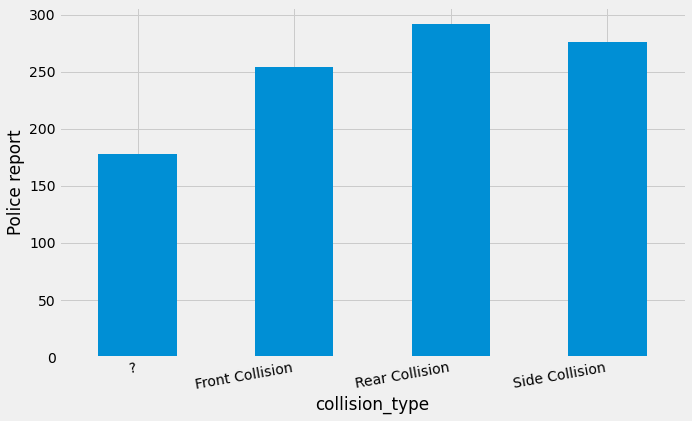

In [30]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(10,6))
ax= data.groupby('collision_type').police_report_available.count().plot.bar(ylim=0)
ax.set_ylabel('Police report')
ax.set_xticklabels(ax.get_xticklabels(), rotation=10, ha="right")
plt.show()

In [31]:
#For property damage
data.property_damage.value_counts()

?      360
NO     338
YES    302
Name: property_damage, dtype: int64

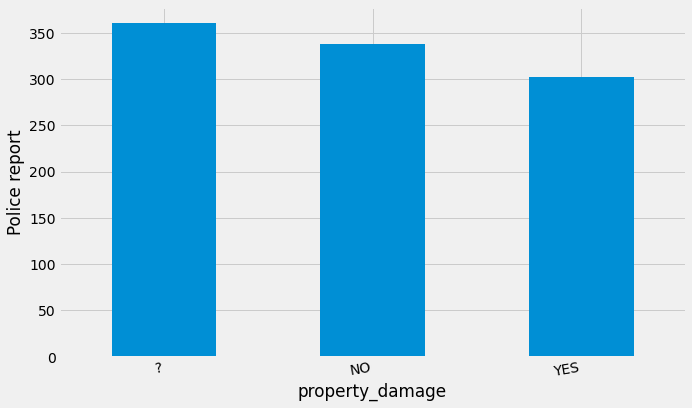

In [32]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(10,6))
ax= data.groupby('property_damage').police_report_available.count().plot.bar(ylim=0)
ax.set_ylabel('Police report')
ax.set_xticklabels(ax.get_xticklabels(), rotation=10, ha="right")
plt.show()

In [33]:
#For police report
data.police_report_available.value_counts()

NO     343
?      343
YES    314
Name: police_report_available, dtype: int64

In [34]:
data.columns

Index(['months_as_customer', 'age', 'policy_state', 'policy_csl',
       'policy_deductable', 'policy_annual_premium', 'umbrella_limit',
       'insured_sex', 'insured_education_level', 'insured_occupation',
       'insured_hobbies', 'insured_relationship', 'capital-gains',
       'capital-loss', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'fraud_reported', 'vehicle_age',
       'incident_period_of_day'],
      dtype='object')

In [35]:
#Let me get the numeric data for all the columns
data._get_numeric_data().columns

Index(['months_as_customer', 'age', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'capital-gains',
       'capital-loss', 'number_of_vehicles_involved', 'bodily_injuries',
       'witnesses', 'total_claim_amount', 'injury_claim', 'property_claim',
       'vehicle_claim', 'fraud_reported', 'vehicle_age'],
      dtype='object')

In [36]:
#Let me get the object data for all the columns
data.select_dtypes(include=['object']).columns

Index(['policy_state', 'policy_csl', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_hobbies', 'insured_relationship',
       'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'property_damage', 'police_report_available', 'auto_make', 'auto_model',
       'incident_period_of_day'],
      dtype='object')

In [38]:
dummies = pd.get_dummies(data[[
    'policy_state', 
    'policy_csl', 
    'insured_sex', 
    'insured_education_level',
    'insured_occupation', 
    'insured_hobbies', 
    'insured_relationship',
    'incident_type', 
    'incident_severity',
    'authorities_contacted', 
    'incident_state', 
    'incident_city',
    'auto_make', 
    'auto_model',
    'incident_period_of_day']])

dummies = dummies.join(data[[
    'collision_type', 
    'property_damage', 
    'police_report_available', 
    "fraud_reported"]])

dummies.head()

,policy_state_IL,policy_state_IN,policy_state_OH,policy_csl_100/300,policy_csl_250/500,policy_csl_500/1000,insured_sex_FEMALE,insured_sex_MALE,insured_education_level_Associate,insured_education_level_College,...,incident_period_of_day_early_morning,incident_period_of_day_evening,incident_period_of_day_fore-noon,incident_period_of_day_morning,incident_period_of_day_night,incident_period_of_day_past_midnight,collision_type,property_damage,police_report_available,fraud_reported
0,0,0,1,0,1,0,0,1,0,0,...,1,0,0,0,0,0,Side Collision,YES,YES,1
1,0,1,0,0,1,0,0,1,0,0,...,0,0,0,1,0,0,?,?,?,1
2,0,0,1,1,0,0,1,0,0,0,...,0,0,0,1,0,0,Rear Collision,NO,NO,0
3,1,0,0,0,1,0,1,0,0,0,...,1,0,0,0,0,0,Front Collision,?,NO,1
4,1,0,0,0,0,1,0,1,1,0,...,0,1,0,0,0,0,?,NO,NO,0


In [39]:
#Converedt all ino one hot as required

In [40]:
X = dummies.iloc[:, 0:-1]
y = dummies.iloc[:, -1]

In [41]:
len(X.columns)

145

In [42]:

X.head()

,policy_state_IL,policy_state_IN,policy_state_OH,policy_csl_100/300,policy_csl_250/500,policy_csl_500/1000,insured_sex_FEMALE,insured_sex_MALE,insured_education_level_Associate,insured_education_level_College,...,incident_period_of_day_afternoon,incident_period_of_day_early_morning,incident_period_of_day_evening,incident_period_of_day_fore-noon,incident_period_of_day_morning,incident_period_of_day_night,incident_period_of_day_past_midnight,collision_type,property_damage,police_report_available
0,0,0,1,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,Side Collision,YES,YES
1,0,1,0,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,?,?,?
2,0,0,1,1,0,0,1,0,0,0,...,0,0,0,0,1,0,0,Rear Collision,NO,NO
3,1,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,Front Collision,?,NO
4,1,0,0,0,0,1,0,1,1,0,...,0,0,1,0,0,0,0,?,NO,NO


In [43]:
y.head()

0    1
1    1
2    0
3    1
4    0
Name: fraud_reported, dtype: int64

In [45]:
#Let me now perform Label Encoding
from sklearn.preprocessing import LabelEncoder
X['collision_en'] = LabelEncoder().fit_transform(dummies['collision_type'])
X[['collision_type', 'collision_en']].head()


,collision_type,collision_en
0,Side Collision,3
1,?,0
2,Rear Collision,2
3,Front Collision,1
4,?,0


In [46]:
X['property_damage'].replace(to_replace='YES', value=1, inplace=True)
X['property_damage'].replace(to_replace='NO', value=0, inplace=True)
X['property_damage'].replace(to_replace='?', value=0, inplace=True)
X['police_report_available'].replace(to_replace='YES', value=1, inplace=True)
X['police_report_available'].replace(to_replace='NO', value=0, inplace=True)
X['police_report_available'].replace(to_replace='?', value=0, inplace=True)

X.head()

,policy_state_IL,policy_state_IN,policy_state_OH,policy_csl_100/300,policy_csl_250/500,policy_csl_500/1000,insured_sex_FEMALE,insured_sex_MALE,insured_education_level_Associate,insured_education_level_College,...,incident_period_of_day_early_morning,incident_period_of_day_evening,incident_period_of_day_fore-noon,incident_period_of_day_morning,incident_period_of_day_night,incident_period_of_day_past_midnight,collision_type,property_damage,police_report_available,collision_en
0,0,0,1,0,1,0,0,1,0,0,...,1,0,0,0,0,0,Side Collision,1,1,3
1,0,1,0,0,1,0,0,1,0,0,...,0,0,0,1,0,0,?,0,0,0
2,0,0,1,1,0,0,1,0,0,0,...,0,0,0,1,0,0,Rear Collision,0,0,2
3,1,0,0,0,1,0,1,0,0,0,...,1,0,0,0,0,0,Front Collision,0,0,1
4,1,0,0,0,0,1,0,1,1,0,...,0,1,0,0,0,0,?,0,0,0


In [47]:
X = X.drop(columns = ['collision_type'])
X.head()

,policy_state_IL,policy_state_IN,policy_state_OH,policy_csl_100/300,policy_csl_250/500,policy_csl_500/1000,insured_sex_FEMALE,insured_sex_MALE,insured_education_level_Associate,insured_education_level_College,...,incident_period_of_day_afternoon,incident_period_of_day_early_morning,incident_period_of_day_evening,incident_period_of_day_fore-noon,incident_period_of_day_morning,incident_period_of_day_night,incident_period_of_day_past_midnight,property_damage,police_report_available,collision_en
0,0,0,1,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,1,1,3
1,0,1,0,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,1,1,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,2
3,1,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
4,1,0,0,0,0,1,0,1,1,0,...,0,0,1,0,0,0,0,0,0,0


In [49]:
X = pd.concat([X, data._get_numeric_data()], axis=1)  # I Am  joining numeric columns
X.head()

,policy_state_IL,policy_state_IN,policy_state_OH,policy_csl_100/300,policy_csl_250/500,policy_csl_500/1000,insured_sex_FEMALE,insured_sex_MALE,insured_education_level_Associate,insured_education_level_College,...,capital-loss,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported,vehicle_age
0,0,0,1,0,1,0,0,1,0,0,...,0,1,1,2,71610,6510,13020,52080,1,14
1,0,1,0,0,1,0,0,1,0,0,...,0,1,0,0,5070,780,780,3510,1,11
2,0,0,1,1,0,0,1,0,0,0,...,0,3,2,3,34650,7700,3850,23100,0,11
3,1,0,0,0,1,0,1,0,0,0,...,-62400,1,1,2,63400,6340,6340,50720,1,4
4,1,0,0,0,0,1,0,1,1,0,...,-46000,1,0,1,6500,1300,650,4550,0,9


In [50]:

X.columns

Index(['policy_state_IL', 'policy_state_IN', 'policy_state_OH',
       'policy_csl_100/300', 'policy_csl_250/500', 'policy_csl_500/1000',
       'insured_sex_FEMALE', 'insured_sex_MALE',
       'insured_education_level_Associate', 'insured_education_level_College',
       ...
       'capital-loss', 'number_of_vehicles_involved', 'bodily_injuries',
       'witnesses', 'total_claim_amount', 'injury_claim', 'property_claim',
       'vehicle_claim', 'fraud_reported', 'vehicle_age'],
      dtype='object', length=161)

In [51]:
X = X.drop(columns = ['fraud_reported'])
X.columns

Index(['policy_state_IL', 'policy_state_IN', 'policy_state_OH',
       'policy_csl_100/300', 'policy_csl_250/500', 'policy_csl_500/1000',
       'insured_sex_FEMALE', 'insured_sex_MALE',
       'insured_education_level_Associate', 'insured_education_level_College',
       ...
       'capital-gains', 'capital-loss', 'number_of_vehicles_involved',
       'bodily_injuries', 'witnesses', 'total_claim_amount', 'injury_claim',
       'property_claim', 'vehicle_claim', 'vehicle_age'],
      dtype='object', length=160)

In [52]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# evaluate an LDA model on the dataset using k-fold cross validation
model = LinearDiscriminantAnalysis()
kfold = KFold(n_splits=5, random_state=7)
result = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')
print(result.mean())

0.841


# Random Forrest

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=41)

In [56]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score

In [57]:
#Randomforest classifier
rff = RandomForestClassifier(random_state = 0)
rff.fit(X_train, y_train)

y_pred_train = rff.predict(X_train)
y_pred_test = rff.predict(X_test)

#Accuracy score
print('Accuracy score for test data using Random Forest :', accuracy_score(y_test,y_pred_test))

Accuracy score for test data using Random Forest : 0.685


In [58]:
#Here we got 68.5% accuracy

# Logistic Regression

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
log_reg = LogisticRegression()

In [60]:

log_reg.fit(X_train,y_train)

LogisticRegression()

In [62]:
y_pred = log_reg.predict(X_test)

In [63]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.68

In [64]:
#Here we find the accuracy around same that is 68%

# Gradient Boosting Techniques

In [65]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report

In [68]:
gbdt_clf = GradientBoostingClassifier()
gbdt_clf.fit(X_train,y_train)
pred = gbdt_clf.predict(X_train)
gbdt_clf_report = pd.DataFrame(classification_report(y_train,pred,output_dict = True))
print("\n================Train Result===========")
print(f"Accuracy score : {accuracy_score(y_train , pred)*100:.2f}%")
print("------------------------")
print(f"Classification report :\n {gbdt_clf_report}")
print("________________________________________")
print(f"Confusion matrix : \n {confusion_matrix(y_train , pred)}\n")


#*******************************Test Score*****************************************

pred = gbdt_clf.predict(X_test)
clf_report = pd.DataFrame(classification_report(y_test,pred,output_dict = True))
print("\n====================Test Result=========================")
print(f"Accuracy score : {accuracy_score(y_test,pred)*100:.2f}%")
print("------------------------")
print(f"Classification report :\n {gbdt_clf_report}")
print("________________________________________")
print(f"Confusion matrix : \n {confusion_matrix(y_test , pred)}\n")


================Train Result===========
Accuracy score : 97.62%
------------------------
Classification report :
                     0           1  accuracy   macro avg  weighted avg
precision    0.979200    0.965714   0.97625    0.972457      0.976132
recall       0.990291    0.928571   0.97625    0.959431      0.976250
f1-score     0.984714    0.946779   0.97625    0.965747      0.976084
support    618.000000  182.000000   0.97625  800.000000    800.000000
________________________________________
Confusion matrix : 
 [[612   6]
 [ 13 169]]


====================Test Result=========================
Accuracy score : 74.00%
------------------------
Classification report :
                     0           1  accuracy   macro avg  weighted avg
precision    0.979200    0.965714   0.97625    0.972457      0.976132
recall       0.990291    0.928571   0.97625    0.959431      0.976250
f1-score     0.984714    0.946779   0.97625    0.965747      0.976084
support    618.000000  182.000000   0

In [69]:
#Under Gradient Boosting for train we got 97% and for test we got 74% better than last previosu two

In [70]:
#Let me check by hyperparameter tuning if I can get better efficieny :
 #Tuning the data :
grid_param = {
        'max_depth' : range(4,12,2),
        'learning_rate' : np.arange(0.1,1,0.1),
        'min_samples_split' : range(4,8,2)
    }

In [72]:
from sklearn.model_selection import train_test_split , GridSearchCV
grid = GridSearchCV(gbdt_clf , param_grid = grid_param)
grid.fit(X_train,y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                         'max_depth': range(4, 12, 2),
                         'min_samples_split': range(4, 8, 2)})

In [73]:
grid.best_params_

{'learning_rate': 0.7000000000000001, 'max_depth': 8, 'min_samples_split': 6}

In [74]:
gbdt_clf = GradientBoostingClassifier(
    max_depth = 8,min_samples_split=6, learning_rate=0.7000000000000001)
gbdt_clf.fit(X_train , y_train)
pred = gbdt_clf.predict(X_train)

In [76]:
gbdt_clf = GradientBoostingClassifier()
gbdt_clf.fit(X_train,y_train)
pred = gbdt_clf.predict(X_train)
gbdt_clf_report = pd.DataFrame(classification_report(y_train,pred,output_dict = True))
print("\n================Train Result===========")
print(f"Accuracy score : {accuracy_score(y_train , pred)*100:.2f}%")
print("------------------------")
print(f"Classification report :\n {gbdt_clf_report}")
print("________________________________________")
print(f"Confusion matrix : \n {confusion_matrix(y_train , pred)}\n")


#*******************************Test Score*****************************************

pred = gbdt_clf.predict(X_test)
clf_report = pd.DataFrame(classification_report(y_test,pred,output_dict = True))
print("\n====================Test Result=========================")
print(f"Accuracy score : {accuracy_score(y_test,pred)*100:.2f}%")
print("------------------------")
print(f"Classification report :\n {gbdt_clf_report}")
print("________________________________________")
print(f"Confusion matrix : \n {confusion_matrix(y_test , pred)}\n")


================Train Result===========
Accuracy score : 97.62%
------------------------
Classification report :
                     0           1  accuracy   macro avg  weighted avg
precision    0.979200    0.965714   0.97625    0.972457      0.976132
recall       0.990291    0.928571   0.97625    0.959431      0.976250
f1-score     0.984714    0.946779   0.97625    0.965747      0.976084
support    618.000000  182.000000   0.97625  800.000000    800.000000
________________________________________
Confusion matrix : 
 [[612   6]
 [ 13 169]]


====================Test Result=========================
Accuracy score : 74.00%
------------------------
Classification report :
                     0           1  accuracy   macro avg  weighted avg
precision    0.979200    0.965714   0.97625    0.972457      0.976132
recall       0.990291    0.928571   0.97625    0.959431      0.976250
f1-score     0.984714    0.946779   0.97625    0.965747      0.976084
support    618.000000  182.000000   0

In [77]:
#Its still the same after Hyperparameter tuning as well that is 74%

# Random Forrest Regressor

In [78]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train , y_train)

RandomForestRegressor()

In [80]:
y_pred = reg_rf.predict(X_test)

In [81]:
reg_rf.score(X_train , y_train)

0.9122301646573491

In [82]:
reg_rf.score(X_test , y_test)

0.325994301994302

In [83]:
#Here we got very less it is 32.599%

# Decission Tree

In [85]:
from sklearn.tree import DecisionTreeClassifier
model1 = DecisionTreeClassifier(random_state=1)
model1.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.79      0.85      0.82       135
           1       0.64      0.54      0.58        65

    accuracy                           0.75       200
   macro avg       0.71      0.70      0.70       200
weighted avg       0.74      0.75      0.74       200



In [86]:
#A better seems to be 75%

# Checking ROC

In [87]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.metrics import plot_roc_curve

In [88]:
lr = LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
kn = KNeighborsClassifier()

In [89]:
#Trainning with all classifiers

lr.fit(X_train,y_train)
rf.fit(X_train,y_train)
kn.fit(X_train,y_train)
dt.fit(X_train,y_train)

print('All models are trained')

All models are trained


In [90]:
#All models score captured
lr.score(X_test,y_test)
rf.score(X_test,y_test)
kn.score(X_test,y_test)
dt.score(X_test,y_test)
print('All models score is captured ')

All models score is captured 


In [92]:
#RandomForestClassifier
roc_auc_score(y_test,rf.predict(X_test))

0.5789173789173789

In [93]:
#Logistic Regression
roc_auc_score(y_test,lr.predict(X_test))

0.5116809116809117

In [95]:
#KNeighbors Classifier
roc_auc_score(y_test,kn.predict(X_test))

0.5663817663817664

In [96]:
#Decision Tree CLassifier
roc_auc_score(y_test,dt.predict(X_test))

0.6991452991452992

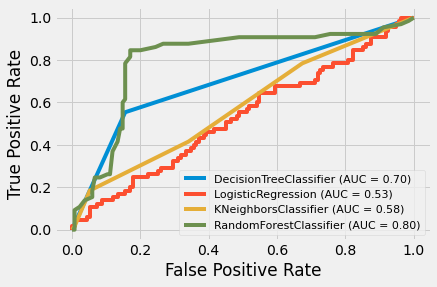

In [97]:
disp = plot_roc_curve(dt,X_test,y_test)
plot_roc_curve(lr,X_test,y_test,ax=disp.ax_)   #ax_ = Axies with confusion matrix
plot_roc_curve(kn,X_test,y_test,ax=disp.ax_)
plot_roc_curve(rf,X_test,y_test,ax=disp.ax_)
plt.legend(prop={'size':11},loc='lower right')
plt.show()

In [98]:
#Here we find the Random Forrest Classifier is the best,so we would choose that particular model.

In [99]:
import pickle
automobile = 'finalized_model.pickle'
pickle.dump(rff,open(automobile,'wb'))

In [101]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled = scaler.fit_transform(X)

In [102]:
loaded_model=pickle.load(open(automobile,'rb'))
a=loaded_model.predict(scaler.transform(X))

# Thank You